### 4.1 从数据中学习
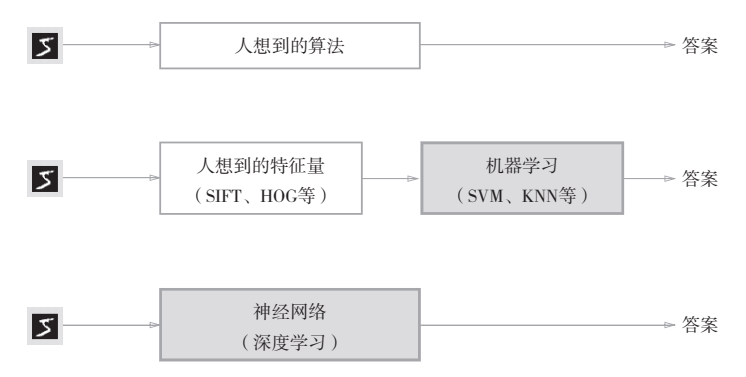
#### 4.1.2 训练数据和测试数据


### 4.2 损失函数
#### 4.21 均值方差
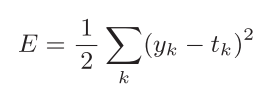

###### 【实现】

In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

#### 4.2.2 交叉熵误差

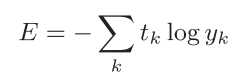
###### 【实现】

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

#### 4.2.3 mini-batch 学习
以交叉熵误差为例
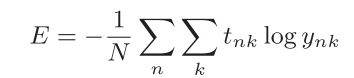
##### 我们从全部数据中选出一部分，作为全部数据的“近似”

In [3]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [4]:
(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

In [5]:
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [6]:
x_train.shape[0]

60000

In [7]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
# 从0到59999之间随机选择10个数字
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
# 指定这些随机选出的索引，取出mini-batch

#### 4.2.4 mini-batch 版交叉熵误差的实现

In [8]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [9]:
# 当监督数据是标签形式（非one-hot表示，而是像“2”“7”这样的标签）时，
# 交叉熵误差可通过如下代码实现:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

#### 4.3.1 用程序来实现导数
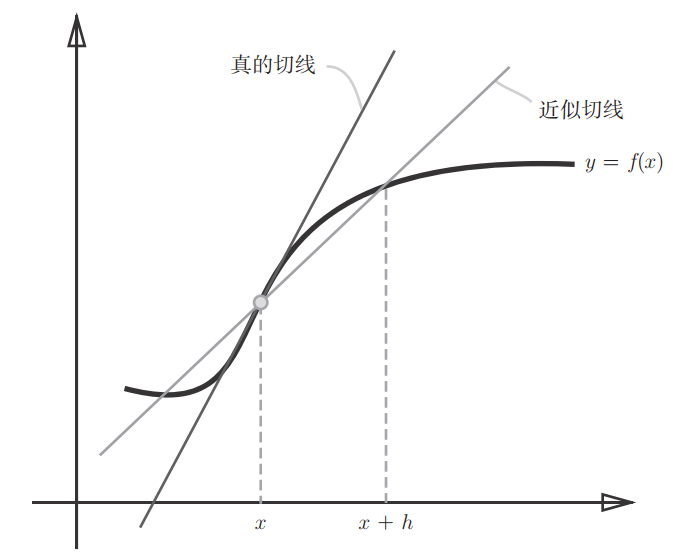

In [10]:
def numerical_diff(f,x):
    h  = 1e-4 #0.0001
    return (f(x+h) - f(x-h))/(2*h)

##### 接下来我们以下列函数为例，求导
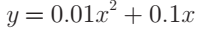

In [11]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [12]:
import numpy as np
import matplotlib.pylab as plt

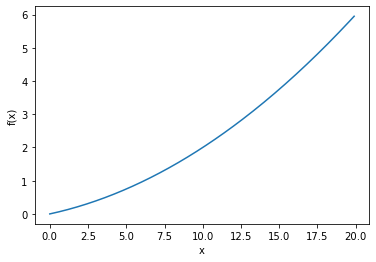

In [13]:
x = np.arange(0.0, 20.0, 0.1) # 以0.1为单位，从0到20的数组x
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

In [14]:
numerical_diff(function_1, 5)
numerical_diff(function_1, 10)

0.2999999999986347

In [15]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
    

0.1999999999990898


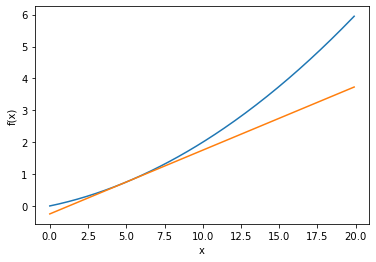

In [16]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)

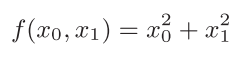

In [17]:
def function_2(x):
    return np.sum(x**2);

In [18]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

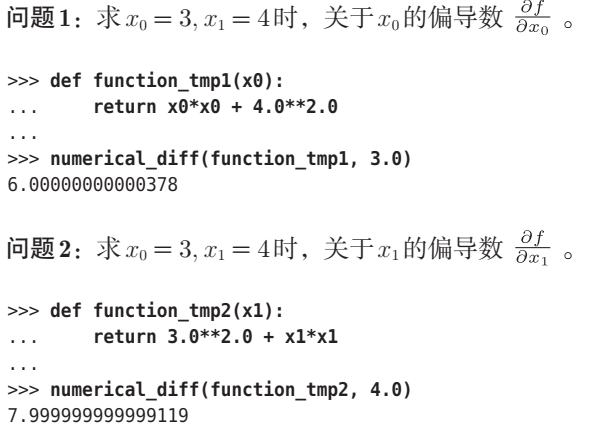

In [19]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和x形状相同的数组
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
    return grad

In [20]:
numerical_gradient(function_2, np.array([3.0, 4.0]))


array([6., 8.])

In [21]:
numerical_gradient(function_2, np.array([0.0, 2.0]))


array([0., 4.])

In [22]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [23]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [24]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [25]:
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

In [26]:
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

In [27]:
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()


NameError: name '_numerical_gradient_no_batch' is not defined

### 用Python来实现梯度下降法

In [28]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
        
    return x;    

In [29]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

NameError: name '_numerical_gradient_no_batch' is not defined

#### 用图像观察梯度的变化情况
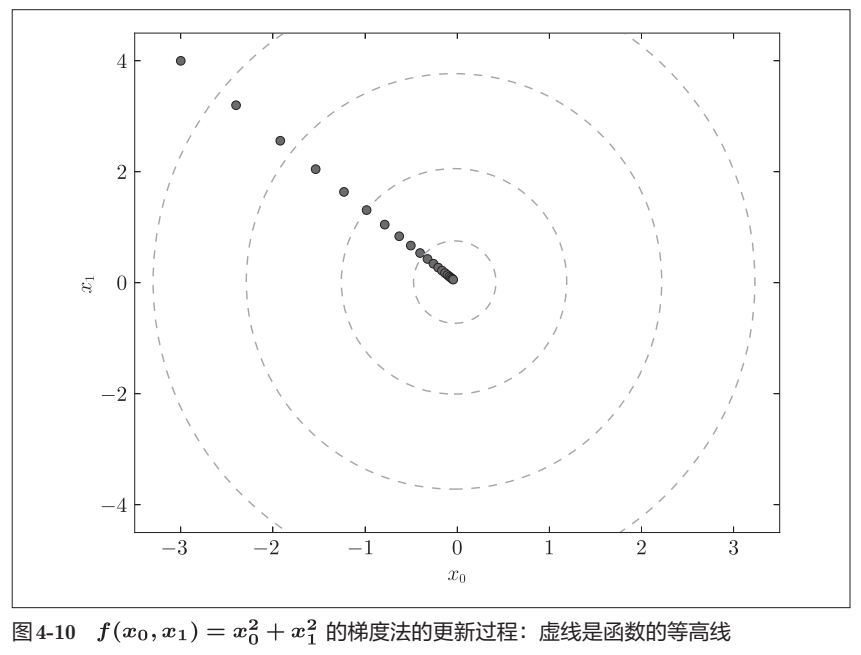

In [30]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

In [31]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

NameError: name '_numerical_gradient_no_batch' is not defined

NameError: name 'x_history' is not defined

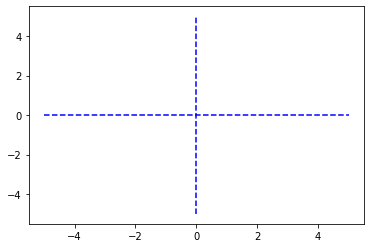

In [32]:
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")

### 4.4.2 神经网络的梯度
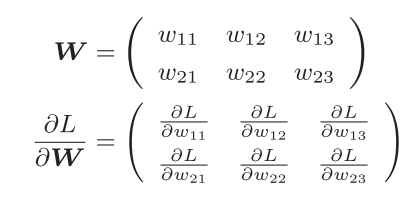

In [60]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [61]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 用高斯分布进行初始化
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [65]:
net = simpleNet()
print(net.W) # 权重参数，随机值，每次都不一样

[[-0.0483248  -1.19407242  0.5132011 ]
 [-0.67492087  1.47871674  1.14700014]]


In [66]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.63642366  0.61440162  1.34022079]


In [67]:
np.argmax(p) # 最大值的索引

2

In [68]:
t = np.array([0, 0, 1]) # 正确解标签
net.loss(x, t)

0.4839441562459971

In [69]:
def f(W):
    return net.loss(x, t)

#### Python中如果定义的是简单的函数，可以使用 lambda表示法
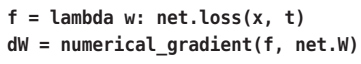

In [70]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.05123079  0.17896066 -0.23019145]
 [ 0.07684619  0.26844099 -0.34528718]]
